In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [32]:
#데이터 읽어와서 확인하기
iris_data = pd.read_csv("iris.csv")
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [3]:
iris_data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
iris_data.value_counts("species")

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [10]:
#데이터 전처리
iris_data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [11]:
iris_data.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [12]:
iris_data[iris_data.duplicated]

,sepal_length,sepal_width,petal_length,petal_width,species
142,5.8,2.7,5.1,1.9,virginica


In [34]:
idx = (iris_data["sepal_length"]==5.8) & (iris_data["petal_width"]==1.9)
iris_data.loc[idx, :]

,sepal_length,sepal_width,petal_length,petal_width,species
101,5.8,2.7,5.1,1.9,virginica
142,5.8,2.7,5.1,1.9,virginica


In [31]:
iris2 = iris_data.drop_duplicates()
iris2[iris2.duplicated]

,sepal_length,sepal_width,petal_length,petal_width,species


In [35]:
iris2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  149 non-null    float64
 1   sepal_width   149 non-null    float64
 2   petal_length  149 non-null    float64
 3   petal_width   149 non-null    float64
 4   species       149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [16]:
#데이터 그룹핑
total =iris2.groupby("species").sum()
avg = iris2.groupby("species").mean()

print(total)
print(avg)

            sepal_length  sepal_width  petal_length  petal_width
species                                                         
setosa             250.3        171.4          73.1         12.3
versicolor         296.8        138.5         213.0         66.3
virginica          323.6        146.0         272.5         99.4
            sepal_length  sepal_width  petal_length  petal_width
species                                                         
setosa          5.006000     3.428000      1.462000     0.246000
versicolor      5.936000     2.770000      4.260000     1.326000
virginica       6.604082     2.979592      5.561224     2.028571


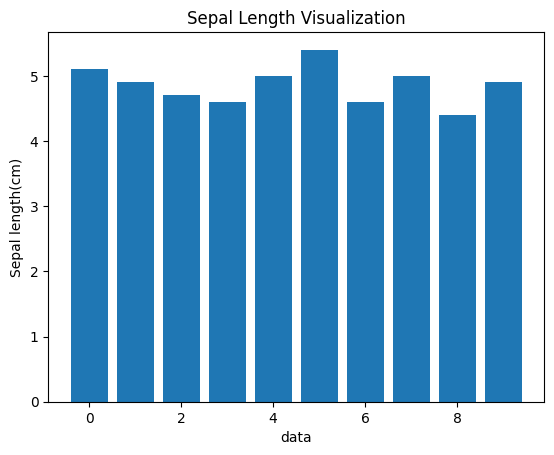

In [36]:
#데이터 시각화
#1. 막대그래프
plt.bar(iris2.index[:10], iris2.sepal_length[:10])
plt.title("Sepal Length Visualization")
plt.xlabel("data")
plt.ylabel("Sepal length(cm)")
plt.show()

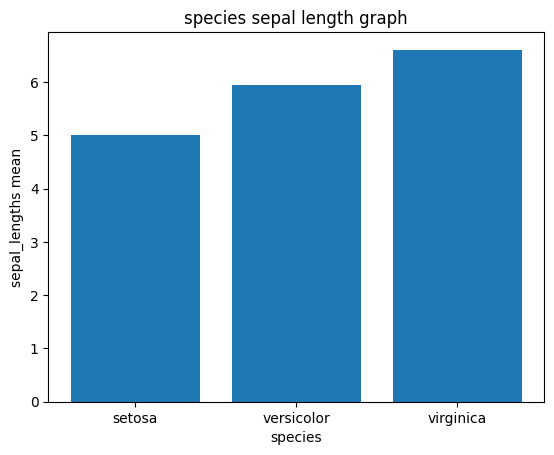

In [37]:
iris3 = iris2.groupby("species").mean()
plt.bar(iris3.index, iris3["sepal_length"])
plt.title("species sepal length graph")
plt.xlabel("species")
plt.ylabel("sepal_lengths mean")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

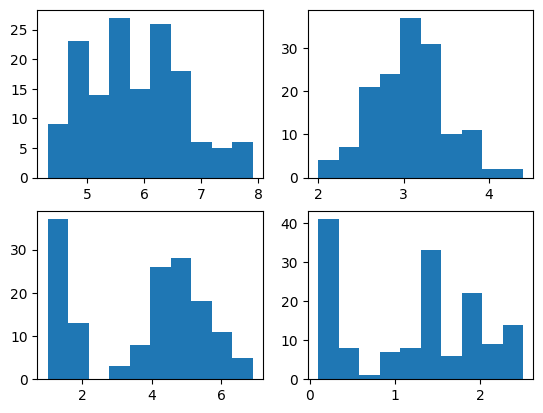

In [26]:
#2. 히스토그램 그래프 그리기
fig, axs = plt.subplots(2,2)
axs[0,0].hist(iris2["sepal_length"])
axs[0,1].hist(iris2["sepal_width"])
axs[1,0].hist(iris2["petal_length"])
axs[1,1].hist(iris2["petal_width"])
plt.show

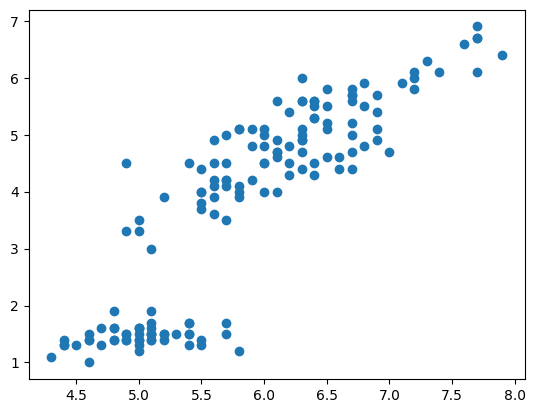

In [27]:
plt.scatter(x=iris2['sepal_length'], y=iris2["petal_length"])
plt.show()